In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut # use this lib
from sklearn.model_selection import KFold  # or just kfold with n 
from sklearn.metrics import mean_squared_error # MSE calculation (guess,true)
import statistics #use statistics.stdev(list)

In [41]:


mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
y = np.random.normal(mu, sigma, 100)

In [42]:
index = 0 
for i in x :
    y_i = i - 2 * i**2 
    y_i = y[index] + y_i
    y[index] = y_i
    index += 1 


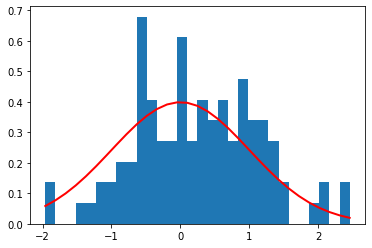

In [43]:
# Verify X
count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

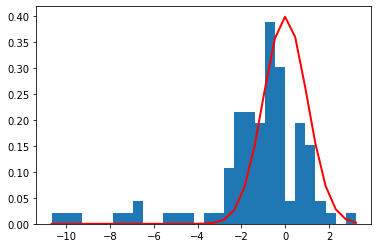

In [44]:
# Verify Y
count, bins, ignored = plt.hist(y, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [45]:
# Setting up comparision values
x_2_base = []
x_3_base = []
x_4_base = []
for i in range(0, len(x)):
    x_2_base.append(x[i] ** 2)
    x_3_base.append(x[i] ** 3)
    x_4_base.append(x[i] ** 4) 
    
x_2 = np.array([x, x_2_base])
x_3 = np.array([x, x_2_base, x_3_base])
x_4 = np.array([x, x_2_base, x_3_base, x_4_base])

#print(x_3_base) 


In [80]:
def count_mse_new(x, y):
    MSE = 0
    
    loocv = LeaveOneOut()
    
    print(loocv.get_n_splits(x) )
    has_columns = False
    try:
    # Solves x2
        print(x[0][0]) 
        has_columns = True 
        all_x_test_lst = []
        y_test_lst = []
        y_has_value = False
        for columns in x: 
            x_test_lst = []
            print( "Length of Columns " , loocv.get_n_splits(columns) ) 
            for train_index, test_index in loocv.split(columns): 
                 
                X_train, X_test = columns[train_index], columns[test_index]
                y_train, y_test = y[train_index], y[test_index]   
#                 print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
                x_test_lst.append(X_test)
    
                if y_has_value is False:
                    y_test_lst.append(y_test) 
            y_has_value = True
            all_x_test_lst.append(x_test_lst) 
        print("all_x_test_lst" , all_x_test_lst[0]) 
        print("all_x_test_lst" , all_x_test_lst[1]) 
        print("y_test_lst" , y_test_lst)
        
#         # Calculate MSE 
        real_x = []
        print(len(all_x_test_lst))
        for rows in range(0, len(all_x_test_lst[0])): 
            local_total = 0
            for columns in range(0, len(all_x_test_lst)):
                local_total +=  all_x_test_lst[columns][rows]
            real_x.append(local_total)
        print(len(real_x))
        MSE = mean_squared_error(real_x, y_test_lst)
        print(MSE)

        
    # Solves x1
#     except Exception as e:
    except Exception as e:
        x_test_lst = []
        y_test_lst = []
        for train_index, test_index in loocv.split(x): 
                 
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]   
#             print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
            x_test_lst.append(X_test)
            y_test_lst.append(y_test)
        MSE = mean_squared_error(x_test_lst, y_test_lst)
        print(MSE)
#         print(e)
    
    print("\n")
    return MSE
# x1_mse  = count_mse_new(x,y)
x2_mse  = count_mse_new(x_2, y)
# x4_mse  = count_mse_new(x_4, y)

2
1.097837840321745
Length of Columns  100
Length of Columns  100
all_x_test_lst [array([1.09783784]), array([0.84075611]), array([-0.67181146]), array([-0.4930802]), array([0.0411682]), array([-0.10614912]), array([1.45445885]), array([2.05947727]), array([0.79061823]), array([-0.52114719]), array([2.16062148]), array([1.21567065]), array([-1.06948586]), array([-0.37477997]), array([1.29569775]), array([0.16146778]), array([0.02456146]), array([1.42034655]), array([-0.61435396]), array([-0.03893694]), array([-1.96044234]), array([-0.51439114]), array([0.83857286]), array([0.74919631]), array([-0.46718048]), array([-0.04313513]), array([0.65148254]), array([0.92055712]), array([-0.80357853]), array([0.00521482]), array([-0.18584448]), array([0.5013432]), array([1.01336886]), array([-0.52861376]), array([-0.34802842]), array([0.85969126]), array([-0.2564604]), array([1.2186469]), array([-0.48638526]), array([0.72680567]), array([-0.62234692]), array([0.80406223]), array([1.96570623]), a

In [19]:
def count_mse(x,y):
    #print(y)
    MSE , STD_DEV = 0 ,0
    
    # leave one out
    loocv = LeaveOneOut()

    #number of splits
    loocv.get_n_splits(x) 
    x_test_mse_list = []
    y_test_mse_list = []
    
    try:
        ## has columns
#         print(x[0][0])
        for i in x :
            ### TODO 
            for train_index, test_index in loocv.split(i): 
                X_train, X_test = i[train_index], i[test_index]
                y_train, y_test = y[train_index], y[test_index]   
#                 print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
                x_test_mse_list.append(X_test)
                y_test_mse_list.append(y_test)
            
    except:
        # single column
        for train_index, test_index in loocv.split(x): 
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]   
#             print("X_train : " , X_train,"\nX_test:",  X_test, "\n y_train :", y_train, "\n y_test", y_test)
            x_test_mse_list.append(X_test)
            y_test_mse_list.append(y_test)
    #print(y_test_mse_list)
    
    std_dev_list = []  
    x_test_mse_list = np.asarray(x_test_mse_list) 
    is_column = False
    for i in range(0 , len(x_test_mse_list)): 
        try:
            std_dev_list_columns = []
            for x in range(0 , len(x_test_mse_list[i])): 

                for q in range(0, len(x_test_mse_list[i][x])): 
                    std_dev_list_columns.append(x_test_mse_list[i][x][q])
            std_dev_list.append(std_dev_list_columns)
        except:
            std_dev_list.append(x_test_mse_list[i][0])
            is_column = True
            pass
         
    #print("is column?" , is_column)
    if is_column is False:
        mean_square_error_list = []
        for i in std_dev_list: 
            #print("i", i , "\ny_test_mse_list" , y_test_mse_list)
            mean_square_error_list.append(mean_squared_error(i, y_test_mse_list)) 
        MSE = sum(mean_square_error_list) / len(mean_square_error_list)
    else: 
        #print("std_dev_list" , std_dev_list , "\ny_test_mse_list" , y_test_mse_list)
        MSE = mean_squared_error(std_dev_list, y_test_mse_list)
    print(MSE)
    return MSE, STD_DEV
x2_mse , x2_std_dev = count_mse(x_2, y)

#x1_mse , x1_std_dev = count_mse(x,y)

26.450607079373


In [49]:
x1_mse , x1_std_dev = count_mse(x,y)

9.02288302201405


In [81]:
x2_mse , x2_std_dev = count_mse(x_2, y)
# 因為line13沒有拆解到全部的所以會錯

12.82042730741493


In [47]:
x3_mse , x3_std_dev = count_mse(x_3, y)

15.57768000339742


In [46]:
x4_mse , x4_std_dev = count_mse(x_4, y)

29.88277397767877
